In [3]:
! pip install librosa


In [35]:
import librosa

audio_path = '/content/drive/My Drive/ASVspoof2019-master.zip (Unzipped Files)/shortdataset/spoof/LA_D_1034049.flac'
x , sr = librosa.load(audio_path)

In [36]:
print(x.shape, sr)


(36705,) 22050


In [37]:
import IPython.display as ipd
ipd.Audio(audio_path)

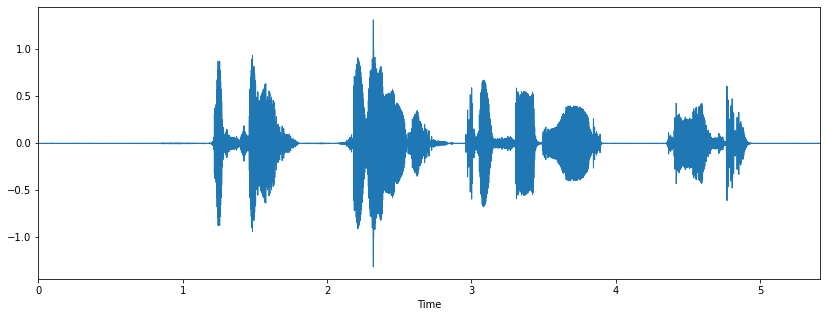

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

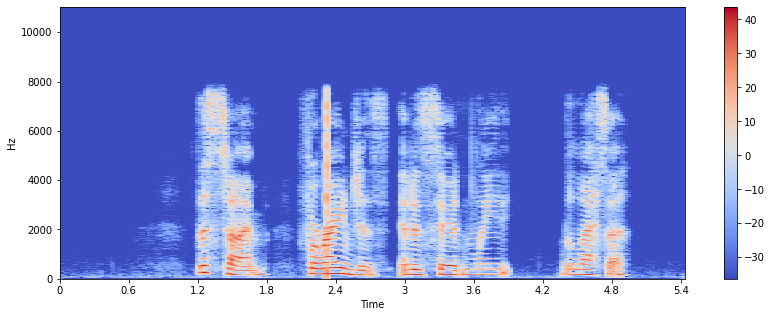

In [ ]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

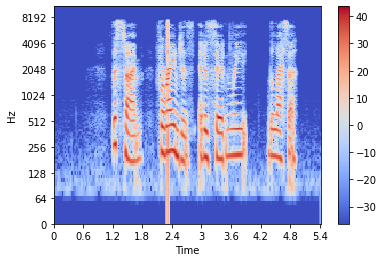

In [ ]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

(20, 234)


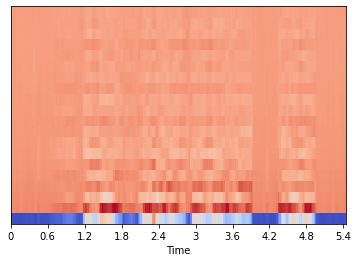

In [ ]:
mfccs = librosa.feature.mfcc(x, sr)
print (mfccs.shape)

#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')


[-8.35039540e-17  2.96059473e-16 -3.03650742e-17  6.07301484e-17
 -7.59126854e-18  3.03650742e-17  6.83214169e-17  1.36642834e-16
 -3.03650742e-17  4.55476113e-17 -6.07301484e-17 -9.10952225e-17
  1.32847200e-17 -3.03650742e-17 -3.03650742e-17  2.27738056e-16
 -4.55476113e-17  1.44234102e-16 -2.88468205e-16 -1.51825371e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


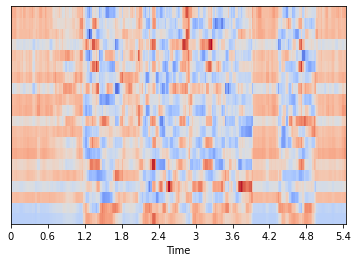

In [ ]:
import sklearn
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [12]:

# feature extractoring and preprocessing data
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
import keras

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
cmap = plt.get_cmap('inferno')

plt.figure(figsize=(10,10))
genres = 'bonafide spoof'.split()
for g in genres:
    pathlib.Path(f'/content/drive/My Drive/ASVspoof2019-master.zip (Unzipped Files)/shortdataset/{g}').mkdir(parents=True, exist_ok=True)     
    for filename in os.listdir(f'/content/drive/My Drive/ASVspoof2019-master.zip (Unzipped Files)/shortdataset/{g}'):
        songname = f'/content/drive/My Drive/ASVspoof2019-master.zip (Unzipped Files)/shortdataset/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        #plt.show()
        plt.savefig(f'/content/drive/My Drive/ASVspoof2019-master.zip (Unzipped Files)/img_data/{g}/{filename[:-3].replace(".", "")}.png')
        #files.download(f'/content/drive/My Drive/ASVspoof2019-master.zip (Unzipped Files)/img_data/{g}/{filename[:-3].replace(".", "")}.png')
        #break;
        plt.clf()

In [20]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()


In [22]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [24]:
rmse = librosa.feature.rmse(y=y)
file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'bonafide spoof'.split()
for g in genres:
     for filename in os.listdir(f'/content/drive/My Drive/ASVspoof2019-master.zip (Unzipped Files)/shortdataset/{g}'):
        songname = f'/content/drive/My Drive/ASVspoof2019-master.zip (Unzipped Files)/shortdataset/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [25]:
data = pd.read_csv('data.csv')
data.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,LA_D_1340209.flac,0.397265,0.068277,1819.828331,1800.360321,3803.002930,0.091221,-353.295236,81.055321,-9.966513,27.419128,-9.271494,-10.822155,-27.605629,-1.123790,-4.263544,-4.996673,-9.330034,-7.080226,-7.555891,-6.248019,1.892967,-13.822245,-3.181379,-10.707258,-10.012357,-7.006812,bonafide
1,LA_D_1293230.flac,0.379899,0.068277,2192.871789,1798.672739,4190.524871,0.147824,-324.757883,71.846541,-23.680789,33.201607,-7.554956,0.816303,-26.425075,-7.510895,-13.028670,-4.848906,-9.837192,-2.679592,4.018094,-12.670820,0.888361,-11.630440,-4.063622,-7.695417,-11.309674,-9.825340,bonafide
2,LA_D_1279882.flac,0.470245,0.068277,1863.371127,1862.271290,4052.338177,0.063917,-432.244318,49.131926,-10.978553,30.581894,3.489440,10.207159,-3.094651,0.101968,-1.169586,2.540592,-1.220815,-3.223304,0.723004,-2.378111,1.182210,-3.280659,1.375430,-4.920378,-4.434816,-6.026657,bonafide
3,LA_D_1245000.flac,0.448196,0.068277,1793.887529,1852.933385,4038.398438,0.077367,-400.013791,49.527291,-13.008850,33.174822,2.586904,3.498349,-4.738696,0.968879,-4.694733,1.222880,-3.307175,-6.603473,0.678821,-3.230434,2.008370,-2.637957,-0.273283,-4.715908,-2.198435,-5.902018,bonafide
4,LA_D_1239754.flac,0.460082,0.068277,1586.425345,1885.236118,3858.205881,0.047841,-449.394427,52.023514,5.011415,19.366755,6.808748,8.632124,6.494868,4.105105,2.324469,3.654362,1.254331,-0.550357,-0.679036,-1.898438,1.219846,-1.735313,-1.103263,-3.851147,-5.296481,-4.680967,bonafide


In [38]:
data = data.drop(['filename'],axis=1)

In [39]:
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

In [40]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [42]:

print(len(y_train))

print(len(y_test))

print(X_train[10])

320
80
[ 1.3608961   0.          0.28110805  1.50317694  1.28441985 -0.82923041
 -1.34357963 -1.66841347  1.63322022 -0.38539676  0.78994997  0.09820129
  0.30396563  1.40780029  1.69401878  0.10630301  1.03287288  1.7887558
 -0.6638213   1.56248769  1.05978611  0.99798996  0.26370436  0.3316962
  1.66931142  2.01300596]


In [43]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

In [44]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
history = model.fit(X_train,
                    y_train,
                    epochs=3,
                    batch_size=128)

Epoch 1/3
3/3 [==============================] - 0s 4ms/step - loss: 4.8708e-05 - accuracy: 1.0000
Epoch 2/3
3/3 [==============================] - 0s 3ms/step - loss: 4.8301e-05 - accuracy: 1.0000
Epoch 3/3
3/3 [==============================] - 0s 3ms/step - loss: 4.7822e-05 - accuracy: 1.0000


In [48]:
test_loss, test_acc = model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 1ms/step - loss: 3.5163e-05 - accuracy: 1.0000


In [49]:
print('test_acc: ',test_acc)

test_acc:  1.0


In [50]:
x_val = X_train[:200]
partial_x_train = X_train[200:]

y_val = y_train[:200]
partial_y_train = y_train[200:]

In [51]:

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=30,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(X_test, y_test)

Epoch 1/30
1/1 [==============================] - 0s 144ms/step - loss: 2.2781 - accuracy: 0.0833 - val_loss: 1.9423 - val_accuracy: 0.9950
Epoch 2/30
1/1 [==============================] - 0s 20ms/step - loss: 1.9319 - accuracy: 1.0000 - val_loss: 1.6382 - val_accuracy: 1.0000
Epoch 3/30
1/1 [==============================] - 0s 20ms/step - loss: 1.6203 - accuracy: 1.0000 - val_loss: 1.2923 - val_accuracy: 1.0000
Epoch 4/30
1/1 [==============================] - 0s 20ms/step - loss: 1.2714 - accuracy: 1.0000 - val_loss: 0.9300 - val_accuracy: 1.0000
Epoch 5/30
1/1 [==============================] - 0s 21ms/step - loss: 0.9140 - accuracy: 1.0000 - val_loss: 0.5998 - val_accuracy: 1.0000
Epoch 6/30
1/1 [==============================] - 0s 19ms/step - loss: 0.5962 - accuracy: 0.9917 - val_loss: 0.3443 - val_accuracy: 1.0000
Epoch 7/30
1/1 [==============================] - 0s 20ms/step - loss: 0.3515 - accuracy: 0.9917 - val_loss: 0.1781 - val_accuracy: 1.0000
Epoch 8/30
1/1 [==========

In [52]:
predictions = model.predict(X_test)

In [53]:
print(predictions)

[[1.00000000e+00 1.06244243e-10 1.17148197e-12 8.57416565e-16
  8.70898622e-13 2.06220145e-15 6.20810573e-14 7.01680576e-13
  3.79639955e-15 1.03947623e-12]
 [1.18219114e-08 1.00000000e+00 7.25150734e-14 4.09962845e-15
  1.26842794e-14 1.09308047e-17 2.55045379e-16 2.21455646e-14
  3.10691092e-15 2.54145934e-13]
 [1.00000000e+00 1.45658696e-09 1.09401811e-11 1.64040365e-14
  8.75409033e-12 1.57347381e-14 9.02501327e-13 6.05186821e-12
  6.20494528e-14 1.84405911e-11]
 [1.00000000e+00 1.30854547e-17 3.79197364e-21 2.83363274e-26
  3.34699228e-21 5.53090903e-26 3.12518008e-23 2.06018237e-21
  2.83819926e-25 9.52745822e-21]
 [1.00000000e+00 1.59303725e-20 3.59042310e-24 3.24134198e-30
  1.91653658e-24 9.43309954e-30 1.31245393e-26 1.13187331e-24
  3.59026353e-29 5.48096889e-24]
 [1.00000000e+00 2.04485582e-17 1.67321206e-20 1.26203558e-25
  1.00119986e-20 3.02301113e-25 1.33344504e-22 6.06672679e-21
  1.05664911e-24 2.31027280e-20]
 [1.00000000e+00 2.73683676e-09 1.71033621e-11 3.02449309e

In [54]:
print(np.sum(predictions[0]))

np.argmax(predictions[0])

1.0


0